In [2]:
from math import sqrt, pi, erf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy import stats

## exercise 1 

**Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [3]:
x0 = 15 #initializing the needed variables
mu = 6.3
sigma = sqrt(6.3) #sigma calculated assuming that the datas follows a poisson distribution


The distribution of the number of hurricanes is assumed to be a Poisson distribution. But the Z test is applied assuming that the distribution is Normal. Thus the test statistic and the p-valued are shown in two different ways. The first one using the Normal distribution and the second one using the Poissonian distribution.

 the Z score is = 3.4661629670697414


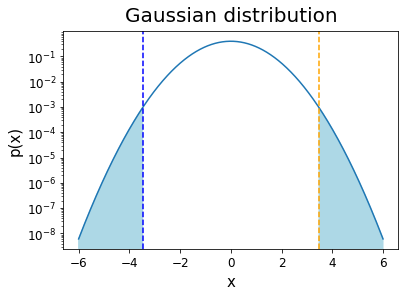

the p-value is = 0.0005279431738299246


In [4]:
#Using Normal distribution

Z = abs(x0 - mu) / sigma #calculating the Z score
print(" the Z score is =", Z)

# plotting the test statistics and its pdf
xs = np.linspace(-6, +6, 1000)
ts = stats.norm.pdf(xs)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(Z), color='lightblue')
plt.axvline(Z, linestyle='--', color='orange')
plt.axvline(-Z, linestyle='--', color='blue')
plt.xlabel("x", fontsize=15, labelpad=5)
plt.yscale("log")
plt.ylabel('p(x)',fontsize=15, labelpad=5)
plt.title('Gaussian distribution', size=20, pad=10)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()


pvalue = stats.norm.cdf(-Z)+(1. - stats.norm.cdf(Z)) #calculating the p-value


print("the p-value is =", pvalue)

Since the $Z-score$ is larger than $3$, the number of hurricanes in 2005 (15) is significantly different.

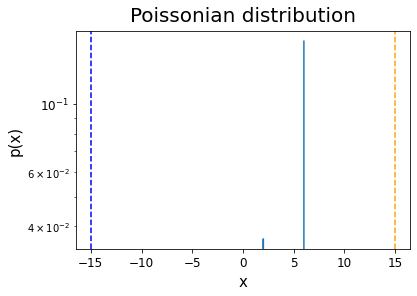

the p-value is= 0.0008444930803583883


In [7]:
#Using Poissonian distribution

Z=15

xs = np.linspace(-6, +6, 1000)
ts = stats.poisson.pmf(xs, 6.3)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(Z), color='lightblue')
plt.axvline(Z, linestyle='--', color='orange')
plt.axvline(-Z, linestyle='--', color='blue')
plt.xlabel("x", fontsize=15, labelpad=5)
plt.yscale("log")
plt.ylabel('p(x)',fontsize=15, labelpad=5)
plt.title('Poissonian distribution', size=20, pad=10)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

pvalue =(1. - stats.poisson.cdf(Z,6.3))

print("the p-value is=", pvalue)

## exercise 2

**Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [6]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100]) #initializing the needed arrays
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

In [19]:
N = len(pre) 

m_1 = np.mean(pre) #calculating the mean of each array
m_2 = np.mean(post)

print(f'the mean of the first datatset is:{m_1}')
print(f'the mean of the second datatset is:{m_2}')

s_1 = np.std(pre) #calculating the standar deviation of each array
s_2 = np.std(post)

print(f'the standard deviation of the first datatset is:{s_1}')
print(f'the standard deviation of the second datatset is:{s_2}')

s = (sqrt((s_1*s_1+s_2*s_2)/2))
print(f'the total standard deviation is:{s}')

the mean of the first datatset is:116.7
the mean of the second datatset is:135.4
the standard deviation of the first datatset is:8.877499647986477
the standard deviation of the second datatset is:11.859173664298876
the total standard deviation is:10.474970167021958


In [20]:
T=((m_1-m_2)/(s*sqrt(2)/sqrt(N))) #calculating the t-student

print(f'the t-student of the datasets is: {T}')

the t-student of the datasets is: -3.991846326292112


 the p-value is = 0.0031489409354536393


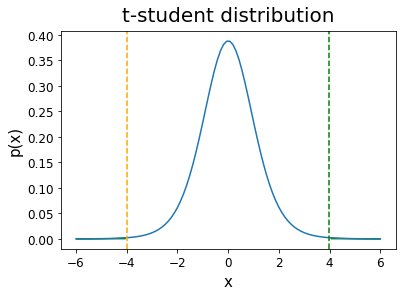

In [21]:
n=N-1 #calculating the dof

#plotting the t-student distribution
xs = np.linspace(-6, +6, 100)
ts = stats.t.pdf(xs,n) 
plt.plot(xs, ts) 
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='g')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='green')
plt.xlabel("x", fontsize=15, labelpad=5)
plt.ylabel('p(x)',fontsize=15, labelpad=5)
plt.title("t-student distribution", size=20, pad=10)
plt.yticks(size=12)
plt.xticks(size=12)

pvalue = stats.t.cdf(T, n) + (1. - stats.t.cdf(-T, n)) 
print(" the p-value is =", pvalue)

Since the $p-values$ is smaller than $\alpha /2$ $(\frac{5\%}{2})$, we reject the null hypothesys. So exposing the individuals  to halogen lamps influences the blood pressure.

## exercise 3

**FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

In [24]:
file=np.loadtxt('populations.txt') #loading the file
print(file)


[[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]
 [ 1905. 20600. 41700. 39800.]
 [ 1906. 18100. 19000. 38600.]
 [ 1907. 21400. 13000. 42300.]
 [ 1908. 22000.  8300. 44500.]
 [ 1909. 25400.  9100. 42100.]
 [ 1910. 27100.  7400. 46000.]
 [ 1911. 40300.  8000. 46800.]
 [ 1912. 57000. 12300. 43800.]
 [ 1913. 76600. 19500. 40900.]
 [ 1914. 52300. 45700. 39400.]
 [ 1915. 19500. 51100. 39000.]
 [ 1916. 11200. 29700. 36700.]
 [ 1917.  7600. 15800. 41800.]
 [ 1918. 14600.  9700. 43300.]
 [ 1919. 16200. 10100. 41300.]
 [ 1920. 24700.  8600. 47300.]]


In [25]:
t=file[:,0] #creating the needed arrays
h = file[:,1]
l = file[:,2]

x=np.int_(t)

([<matplotlib.axis.XTick at 0x7fcd935926d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

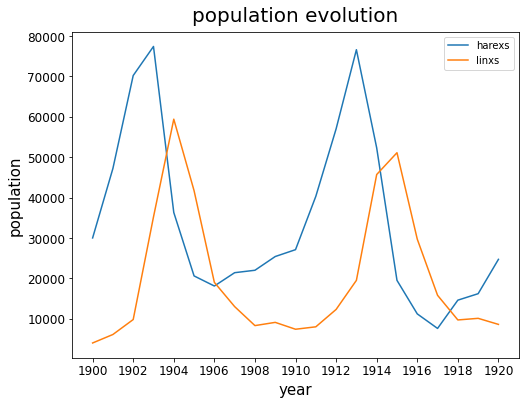

In [26]:
#plotting the populations
plt.figure(figsize=(8, 6))
plt.plot(x,h)
plt.plot(x,l)
plt.xlabel("year", fontsize=15, labelpad=5)
plt.ylabel('population',fontsize=15, labelpad=5)
plt.title("population evolution", size=20, pad=10)
plt.legend(['harexs','linxs'])
plt.yticks(size=12)
plt.xticks(x[::2],size=12)

Firstly the hares population is analyzed

(array([-0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

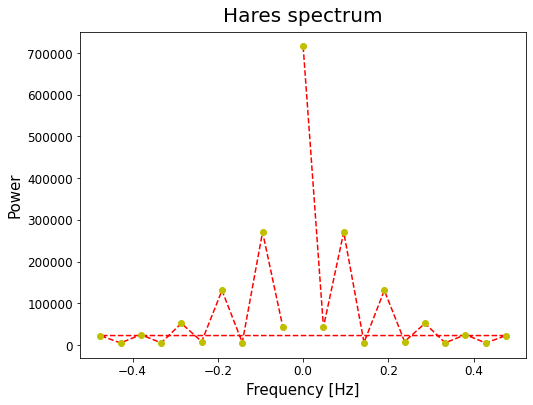

In [27]:
from scipy import fftpack

time_step = t[1]-t[0] #setting the time step
h_fft = fftpack.fft(h) #calculating the fourier transform

power = np.abs(h_fft)  #calculating the absolute value of the fourier transform
sample_freq = fftpack.fftfreq(h.size, d=time_step) #calculating the sample frequencies of the fourier transform

#plotting the power in function of frequency
plt.figure(figsize=(8, 6))
plt.plot(sample_freq, power, 'o--',  markerfacecolor='y',markeredgecolor='y', color='r')
plt.xlabel('Frequency [Hz]', fontsize=15, labelpad=5)
plt.ylabel('Power', fontsize=15, labelpad=5)
plt.title('Hares spectrum', size=20, pad=10)
plt.yticks(size=12)
plt.xticks(size=12)

To calculate the period the frequency associated with the first normal mode is used. This is the frequency associated with the second largest power.

In [28]:
ordered_power=np.sort(power) #sorting the power array
index=np.where(power==ordered_power[-2]) #finding the index of the second largest value of the power array 
f_period_h=sample_freq[index[0][0]] #getting the corresponding frequency

period_h=1/f_period_h #calculating the period

Repeating the process for the lynxs dataset.

(array([-0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

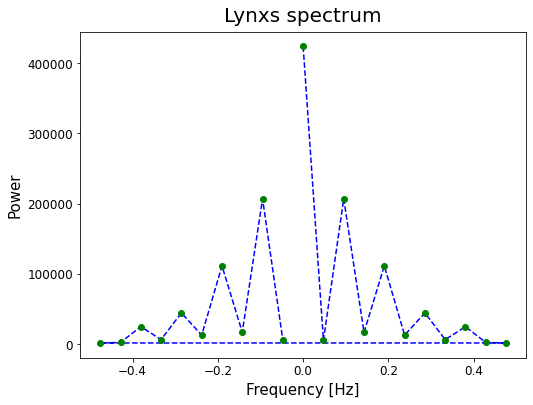

In [29]:

time_step = t[1]-t[0]
l_fft = fftpack.fft(l)

power = np.abs(l_fft)

sample_freq = fftpack.fftfreq(l.size, d=time_step)

plt.figure(figsize=(8, 6))
plt.plot(sample_freq, power, 'o--',  markerfacecolor='g',markeredgecolor='g', color='b')
plt.xlabel('Frequency [Hz]', fontsize=15, labelpad=5)
plt.ylabel('Power', fontsize=15, labelpad=5)
plt.title('Lynxs spectrum', size=20, pad=10)
plt.yticks(size=12)
plt.xticks(size=12)

In [30]:
ordered_power=np.sort(power)
index=np.where(power==ordered_power[-2]) 
f_period_l=sample_freq[index[0][0]] 

period_l=1/f_period_l

In [31]:
h_fft[abs(sample_freq)>f_period_h]=0 #filtering
l_fft[abs(sample_freq)>f_period_l]=0

In [32]:
h=fftpack.ifft(h_fft) # calculate the inverse fourier transform
l=fftpack.ifft(l_fft)

print(f'the period (in years) of the hares population is: {period_h}')
print(f'the period (in years) of the lynxs poupulation is: {period_l}')

the period (in years) of the hares population is: 10.5
the period (in years) of the lynxs poupulation is: 10.5


([<matplotlib.axis.XTick at 0x7fcd94813ee0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

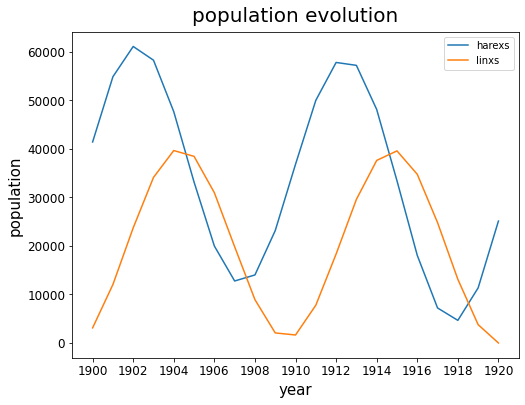

In [33]:
plt.figure(figsize=(8, 6))
plt.plot(x,np.real(h))
plt.plot(x,np.real(l))
plt.xlabel("year", fontsize=15, labelpad=5)
plt.ylabel('population',fontsize=15, labelpad=5)
plt.title("population evolution", size=20, pad=10)
plt.legend(['harexs','linxs'])
plt.yticks(size=12)
plt.xticks(x[::2],size=12)

## exercize 4

**FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

In [34]:
image=plt.imread("moonlanding.png") #loading the image 

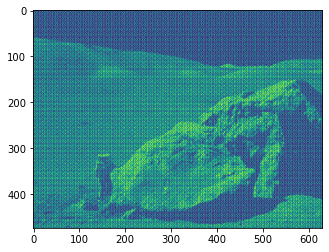

In [35]:
plt.imshow(image) #plotting the image
 
from scipy.fftpack import fft2, ifft2, fftshift
from scipy import fftpack

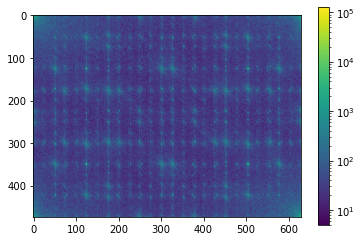

In [36]:
g=fftpack.fft2(image) #calculating the fourier transform

plt.imshow(abs(g), norm=LogNorm(vmin=5))
plt.colorbar()

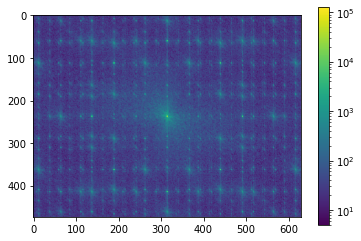

In [37]:
g=fftpack.fftshift(g) #shifting the zero frequency to the center of the spectrum

plt.imshow(abs(g), norm=LogNorm(vmin=5))
plt.colorbar()

From the previous image it is possible to see that peak of the spectrum is placed at the center of it. So in order to filter the image I need to set to zero the zones of the spectrum corresponding to the other frequencies.

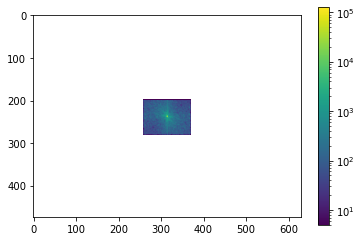

In [38]:
r, c = g.shape

g[:200] = 0
g[280:] = 0

g[:,:260] = 0
g[:,370:] = 0

plt.imshow(abs(g), norm=LogNorm(vmin=5))
plt.colorbar()

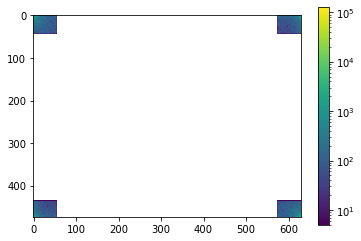

In [39]:
g=fftpack.ifftshift(g) #shifting the frequencies back to their original positions

plt.imshow(abs(g), norm=LogNorm(vmin=5))
plt.colorbar()


In [41]:
filtered = fftpack.ifft2(g) #calculating the inverse trasform 
real_filtered = np.real(filtered) #calculating the real component 

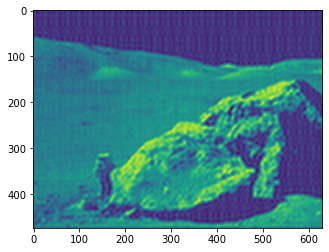

In [42]:
plt.imshow(real_filtered) #plotting the filtered image